In [7]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt
from scipy.signal import convolve2d, correlate2d
import vision.sim_tools.kernels.center_surround as csgen
import vision.sim_tools.kernels.gabor as gabgen
from vision.spike_tools.vis import my_imshow

def mse(mat0, mat1):
    return ((mat0 - mat1)**2).mean()


(-0.27527784430974356, 0.82314792971153594)
-3.33066907388e-16
1.0


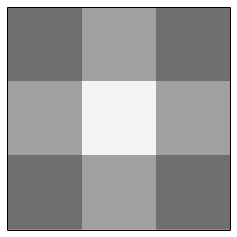

In [8]:
kernel_w = 3
std_dev = 0.8
sd_mult = 6.7
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)
print(csk.min(), csk.max())
print(csk.sum())
print((csk**2).sum())
plt.figure()
ax = plt.subplot(1,1,1)
my_imshow(ax, csk, vmin=-1, vmax=1)
plt.show()

In [9]:
cs_corr0 = convolve2d(csk, csk, mode='same', boundary='wrap')
print(cs_corr0)
cs_corr1 = correlate2d(csk, csk, mode='same')
print(cs_corr1)

[[-0.4442701  0.1942701 -0.4442701]
 [ 0.1942701  1.         0.1942701]
 [-0.4442701  0.1942701 -0.4442701]]
[[-0.44353082  0.03788534 -0.44353082]
 [ 0.03788534  1.          0.03788534]
 [-0.44353082  0.03788534 -0.44353082]]


[0.0, 25.714285714285715, 51.42857142857143, 77.14285714285715, 102.85714285714286, 128.57142857142856, 154.2857142857143]
(0.51636978897887598, -0.51636978897887598)
(0.50094908231990687, -0.50094908231990687)
(0.51593414947506289, -0.51593414947506289)
(0.50037115393959797, -0.50037115393959797)


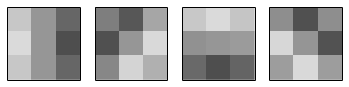

In [11]:
# freq = 4.
freq = 5.
pi_divs = 7
pi_frac = np.pi/float(pi_divs)
gk = gabgen.multi_gabor(kernel_w, [i*pi_frac for i in range(pi_divs)],
                        1.1, freq)
print([i*pi_frac*180./np.pi for i in range(pi_divs)])
cols = 4
rows = len(gk)//cols + 1
plt.figure()
div = 0
for k in gk.keys():
    print(gk[k].max(), gk[k].min())
#     print(k.sum())
#     print((k**2).sum())
    div += 1
    ax = plt.subplot(rows, cols, div)
    my_imshow(ax, gk[k], vmin=-1, vmax=1)#, interpolation='bilinear')
plt.show()

In [ ]:
cols = 4
rows = len(gk)//cols + 1
div = 0
plt.figure()
for k in gk:
    kc = convolve2d(k, k, mode='same')
    print(kc)
    div += 1
    ax = plt.subplot(rows, cols, div)
    my_imshow(ax, kc, vmin=-1, vmax=1)#, interpolation='bilinear')
plt.show()